In [8]:
# Packages, plotting parameters, and folder to save/read data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv 
import seaborn as sns
from scipy.signal import savgol_filter

# Update plotting parameters
params = {'legend.fontsize': 'xx-large',         
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'font.sans-serif': "Arial",
          'font.family': "sans-serif",
          'figure.figsize': (6, 6),
         }
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams.update(params)
font = {'family' : 'sans-serif',
        'size'   : 14}
mpl.rc('font', **font)

# Folder data 
data_folder = "./2021_September16_FIB3/"
fig_folder = "figs/September16_figs/"

In [9]:
# Reads image data and associated line cuts, calculating scintillation enhancement on/off sample
def read_data(file, plot_flag = True, plot_window = ([0,1014],[0,1014])):
    # Reads correlated .csv and image data 
    file0 = data_folder + file
    try:
        img = mpimg.imread(file0 + ".jpg")
        img = np.squeeze(img)
    except FileNotFoundError: 
        try:
            img = mpimg.imread(file0 + ".png")
            img = np.squeeze(img[:,:,0])
        except FileNotFoundError:
            img = []
    pixels, cut, pixels_bg, cut_bg = [], [], [], []
    with open(file0 + '.csv','r') as csvfile: 
        reader = csv.reader(csvfile, delimiter=',', quotechar='|') 
        for row in reader:
            pixels.append(float(row[0]))
            cut.append(float(row[1]))
        pixels = np.array(pixels)
        cut = np.array(cut)
    try:
        with open(file0 + '_Off.csv','r') as csvfile: 
            reader = csv.reader(csvfile, delimiter=',', quotechar='|') 
            for row in reader:
                pixels_bg.append(float(row[0]))
                cut_bg.append(float(row[1]))
            pixels_bg = np.array(pixels_bg)
            cut_bg = np.array(cut_bg)   
    except FileNotFoundError:
        pixels_bg = pixels
        cut_bg = np.ones_like(cut)
    diffcut_smooth = np.diff(savgol_filter(cut,7,1))
    (lp, rp) = (np.where(diffcut_smooth == np.max(diffcut_smooth))[0][0], np.where(diffcut_smooth == np.min(diffcut_smooth))[0][0])
    on_square = np.mean(cut[lp:rp])
    off_square = (np.mean(cut[:lp])+np.mean(cut[rp:]))/2.0
    background = np.mean(cut_bg) 
    print(file)
    print("Enhancement (no bg sub.) : {0} vs. {1} = {2} ({3} %)".format(on_square, off_square, on_square/off_square, (on_square-off_square)/off_square*100.))
    if background > off_square:
        print("Careful! Background is larger than signal.")
    else:
        print("Enhancement : {0} vs. {1} = {2} ({3} %)".format(on_square-background, off_square-background, (on_square-background)/(off_square-background), (on_square-off_square)/(off_square-background)*100.))
    if plot_flag:
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        implot = axs[1].imshow(img[plot_window[1][0]:plot_window[1][1],plot_window[0][0]:plot_window[0][1]], cmap = "inferno")
        axs[1].axis('off')
        axs[1].set_title(file)        
        fig.colorbar(implot)
        axs[0].plot(pixels, cut, label = "signal")
        axs[0].plot(pixels[lp:rp], cut[lp:rp], 'x', label = "on square")
        axs[0].set_xlabel("Pixel index")
        axs[0].set_xticks([0,np.max(pixels)])        
        axs[0].plot(pixels_bg, cut_bg, label = "bg")
        axs[0].legend()        
        # plt.savefig(fig_folder+file+".svg")
    return img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background

# Sample 1 (Dose A and B on 100 microns)

FF01-549-15-25_100microns_A1_Air
Enhancement (no bg sub.) : 2014.5101518987342 vs. 879.0080080893683 = 2.2917995437578766 (129.17995437578767 %)
Enhancement : 1747.3574131724004 vs. 611.8552693630345 = 2.8558345423607587 (185.58345423607588 %)
FF01-549-15-25_100microns_B1_Air
Enhancement (no bg sub.) : 1175.2692137499998 vs. 870.7540989721696 = 1.3497142478425048 (34.97142478425048 %)
Enhancement : 908.193597054647 vs. 603.6784822768168 = 1.504432613912839 (50.443261391283926 %)


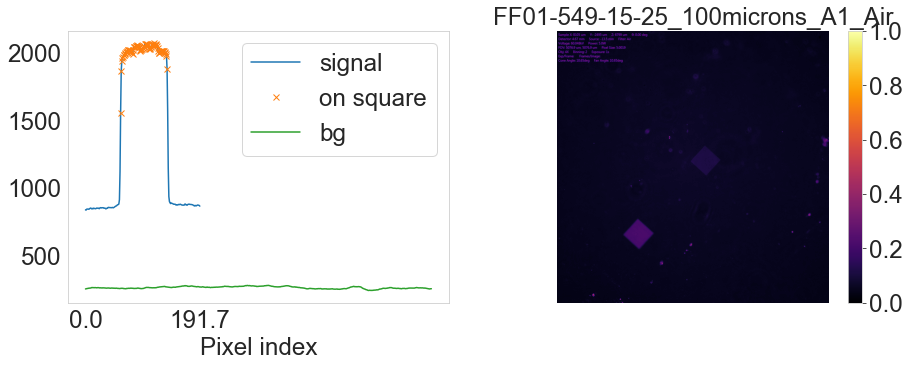

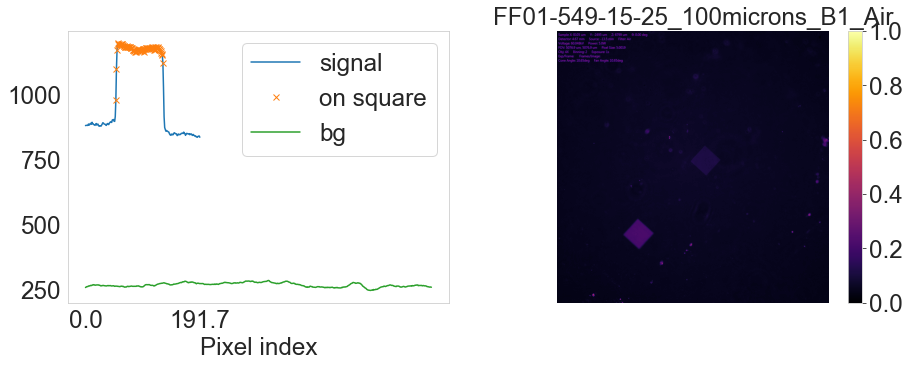

In [10]:
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_100microns_A1_Air");
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_100microns_B1_Air");

# Sample 2 (Dose A small and large on 50 microns)

FF01-549-15-25_50microns_A11_Air
Enhancement (no bg sub.) : 1108.3050679012347 vs. 629.5982836904763 = 1.7603368633801753 (76.03368633801753 %)
Enhancement : 822.3822009947598 vs. 343.6754167840014 = 2.3929037715014214 (139.29037715014212 %)
FF01-549-15-25_50microns_A12_Air
Enhancement (no bg sub.) : 1180.84492875 vs. 635.8980983870968 = 1.856971945261538 (85.69719452615381 %)
Enhancement : 894.9220618435252 vs. 349.9752314806219 = 2.557101135578724 (155.71011355787243 %)
FF01-549-15-25_50microns_A2_Air
Enhancement (no bg sub.) : 1098.9758603773585 vs. 638.2374055954008 = 1.7218919648749553 (72.18919648749554 %)
Enhancement : 813.0529934708836 vs. 352.31453868892595 = 2.3077474931818354 (130.77474931818352 %)


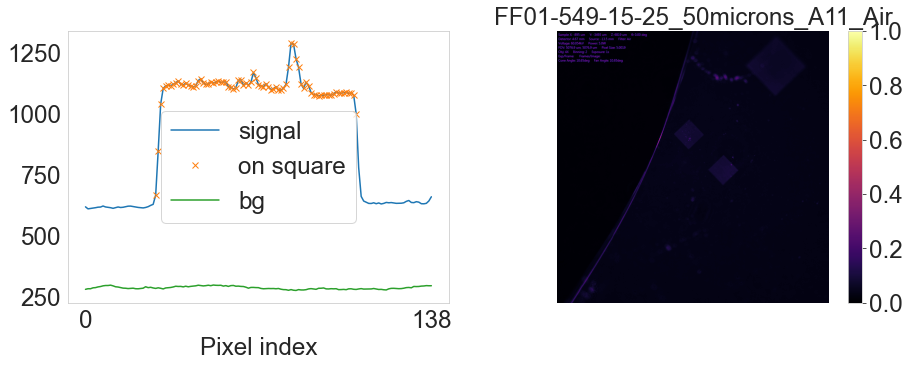

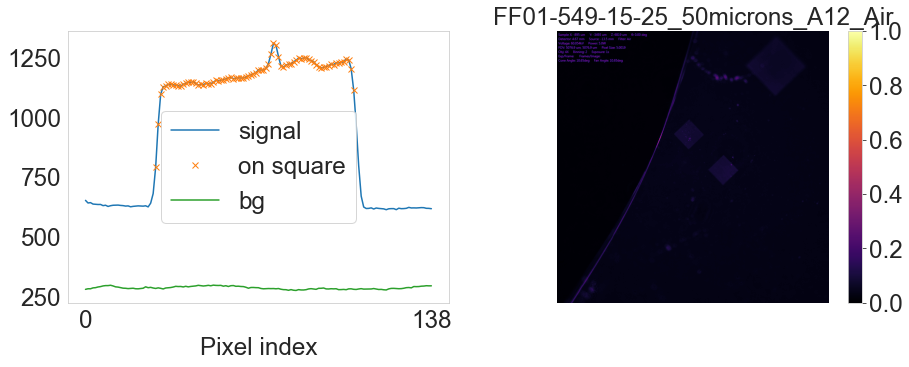

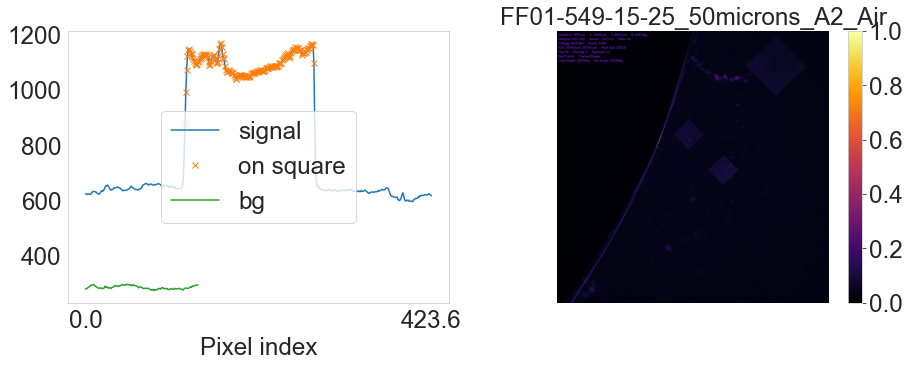

In [11]:
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A11_Air");
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A12_Air");
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A2_Air");

# Demonstration of faster scans

In [12]:
on_signal = []
off_signal = []
times = ["0.1", "0.5", "1", "2", "4", "10"]
for time in times:
    img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("IntegrationTime/"+time+"s", plot_flag = False);
    on_signal.append(on_square-background)
    off_signal.append(off_square-background)    
    

IntegrationTime/0.1s
Enhancement (no bg sub.) : 184.60814375 vs. 83.36561395003065 = 2.2144399231636935 (121.44399231636936 %)
Enhancement : 161.9711281863104 vs. 60.72859838634105 = 2.667131013890494 (166.71310138904937 %)
IntegrationTime/0.5s
Enhancement (no bg sub.) : 877.3982658227849 vs. 415.2637825317125 = 2.1128697053078076 (111.28697053078076 %)
Enhancement : 876.3982658227849 vs. 414.2637825317125 = 2.1155560847409958 (111.55560847409956 %)
IntegrationTime/1s
Enhancement (no bg sub.) : 1746.29114 vs. 828.7304446705427 = 2.1071883520512253 (110.71883520512252 %)
Enhancement : 1474.7504761639825 vs. 557.1897808345252 = 2.646765118260407 (164.67651182604072 %)
IntegrationTime/2s
Enhancement (no bg sub.) : 3486.542594936708 vs. 1667.7591142970402 = 2.0905552636756446 (109.05552636756444 %)
Enhancement : 2938.1798821987873 vs. 1119.3964015591193 = 2.6247894652032357 (162.47894652032355 %)
IntegrationTime/4s
Enhancement (no bg sub.) : 6975.239594936706 vs. 3340.923786249119 = 2.0878

Text(0, 0.5, 'Brightness')

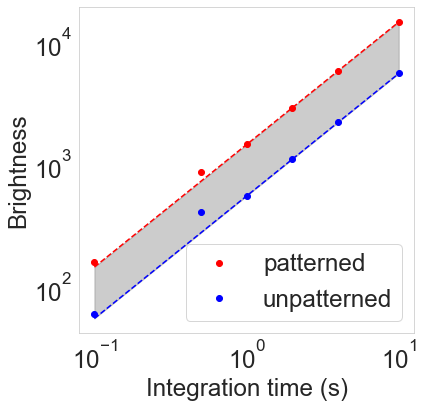

In [13]:
times_plot = [float(t) for t in times]
on_fit = [t*(np.max(on_signal)-np.min(on_signal))/(np.max(times_plot)-np.min(times_plot)) for t in times_plot]
off_fit = [t*(np.max(off_signal)-np.min(off_signal))/(np.max(times_plot)-np.min(times_plot)) for t in times_plot]
plt.loglog(times_plot, on_signal, 'ro', label = "patterned")
plt.loglog(times_plot, on_fit, 'r--')
plt.loglog(times_plot, off_signal, 'bo', label = "unpatterned")
plt.loglog(times_plot, off_fit, 'b--')
plt.fill_between(times_plot, on_fit, off_fit, alpha = 0.2, color = 'black')
plt.legend()
plt.xlabel("Integration time (s)")
plt.ylabel("Brightness")
# plt.savefig("scaling.svg")